In [1373]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [1374]:
train = pd.read_csv('F:\Know_I\DataAndAnalysis\\train.csv', engine='python')
test = pd.read_csv('F:\Know_I\DataAndAnalysis\\test.csv', engine='python') 
gender = pd.read_csv('F:\Know_I\DataAndAnalysis\\gender_submission.csv', engine='python')

In [1375]:
#train = pd.concat([train, test], ignore_index = True, sort=False)
train.head()

#SibSp: Number of Siblings or Spouse
#Parch: Number of Parents or Children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1376]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1377]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1378]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1379]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1380]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [1381]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [1382]:
train.isnull().any().sum()

3

In [1383]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1384]:
train.isnull().sum().sum()

866

In [1385]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [1386]:
train['Fare'].max()

512.3292

In [1387]:
train['Fare'].mean()

32.204207968574636

In [1388]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [1389]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Age'].isnull().any()

False

In [1390]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [1391]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [1392]:
train['Age'].isnull().any()

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


False

In [1393]:
train['Cabin'].fillna("NA", inplace=True) #separate category for nAn values because many nAn

In [1394]:
train['Cabin'].describe()

count     891
unique    148
top        NA
freq      687
Name: Cabin, dtype: object

In [1395]:
train['Cabin'].unique()

array(['NA', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [1396]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [1397]:
train['Embarked'].fillna("S", inplace=True)

In [1398]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [1399]:
#encode Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1400]:
embark_train = np.array(train['Embarked'])
embark_test = np.array(test['Embarked'])

In [1401]:
embark_train = np.array(embark_train).reshape(-1,1)
np.array(embark_train)

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [1402]:
enc = OrdinalEncoder()
train['Embarked'] = enc.fit_transform(embark_train)

In [1403]:
embark_test = np.array(embark_test).reshape(-1,1)
np.array(embark_test)

array([['Q'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
      

In [1404]:
test['Embarked'] = enc.fit_transform(embark_test)

In [1405]:
train['Embarked'].head()

0    2.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [1406]:
test['Embarked'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [1407]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [1408]:
test['Sex'].head()

0      male
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

In [1409]:
sex_train = np.array(train['Sex'])
sex_test = np.array(test['Sex'])
sex_train = np.array(sex_train).reshape(-1,1)
sex_test = np.array(sex_test).reshape(-1,1)

In [1410]:
np.array(sex_train)

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['ma

In [1411]:
np.array(sex_test)

array([['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
    

In [1412]:
train['Sex'] = enc.fit_transform(sex_train)
test['Sex'] = enc.fit_transform(sex_test)

In [1413]:
train['Sex'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Sex, dtype: float64

In [1414]:
test['Sex'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Sex, dtype: float64

In [1415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NA,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NA,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NA,2.0


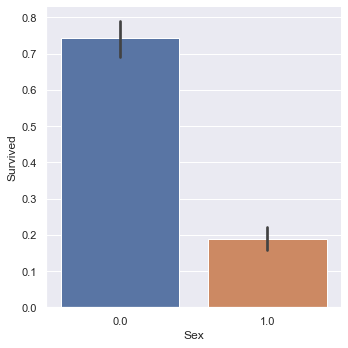

In [1416]:
sns.set(color_codes=True)
sns.catplot(x='Sex', y='Survived', kind='bar', data=train)

In [1417]:
train['Cabin'].describe()

count     891
unique    148
top        NA
freq      687
Name: Cabin, dtype: object

In [1418]:
#More NA so deciding to omit Cabin column

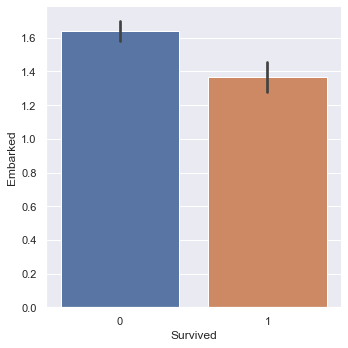

In [1419]:
sns.catplot(x='Survived',y='Embarked',kind='bar', data=train)

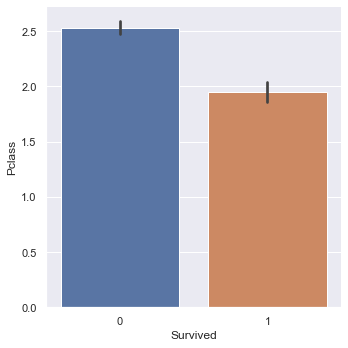

In [1420]:
sns.catplot(x='Survived', y='Pclass',kind='bar', data=train)

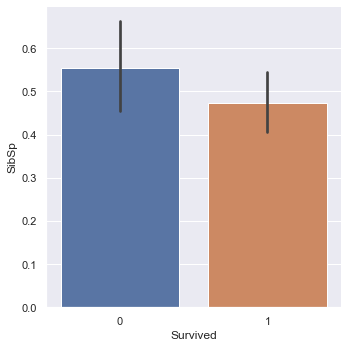

In [1421]:
sns.catplot(x='Survived',y='SibSp', kind='bar', data=train)

In [1422]:
train['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [1423]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [1424]:
def name_title(str):
    result = re.findall('[A-Za-z]+\.', str) #result is a list
    if result:
        return result[0] #iff result is present, returns value at index 0
    else:
        return None

train['Name_Title'] = train['Name'].apply(name_title)
test['Name_Title'] = test['Name'].apply(name_title)
#apply is a pandas function that applies the function for the entire dataframe column

In [1425]:
train['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [1426]:
test['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [1427]:
train['Name_Title'].isnull().any()

False

In [1428]:
train['Name_Title'].describe()

count     891
unique     17
top       Mr.
freq      517
Name: Name_Title, dtype: object

In [1429]:
name_title_train = np.array(train['Name_Title']).reshape(-1, 1)
name_title_test = np.array(test['Name_Title']).reshape(-1, 1)
train['Name_Title'] = enc.fit_transform(name_title_train)
test['Name_Title'] = enc.fit_transform(name_title_test)

In [1430]:
train['Name_Title'].unique()

array([12., 13.,  9.,  8.,  3., 15.,  4., 11., 14.,  7.,  6., 16., 10.,
        1.,  0.,  2.,  5.])

In [1431]:
test['Name_Title'].unique()

array([5., 6., 4., 3., 7., 0., 8., 2., 1.])

In [1432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    float64
 12  Name_Title   891 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 90.6+ KB


In [1433]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NA,2.0,12.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0,13.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NA,2.0,9.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0,13.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NA,2.0,12.0


In [1434]:
train['Name_Title'].unique()

array([12., 13.,  9.,  8.,  3., 15.,  4., 11., 14.,  7.,  6., 16., 10.,
        1.,  0.,  2.,  5.])

In [1435]:
train['Name_Title'] = train['Name_Title'].replace('Miss.', 'Ms.')

In [1436]:
train['Name_Title'].unique()

array([12., 13.,  9.,  8.,  3., 15.,  4., 11., 14.,  7.,  6., 16., 10.,
        1.,  0.,  2.,  5.])

In [1437]:
#game-plan:
    #select features
    #build models
    #train the model
    #test the overall model
    #confusion matrix
    #check sex wise Survival
    #check family wise survival
    #check cabin wise survival

In [1438]:
#features I'd like to select: 
    #age
    #sex
    #pclass
    #sibsp (Siblings and Spouses)
    #embarked
    #parch (Parents and Children)
    #Name_Title: To check if nobles have a higher survival rate
    
#reasons why I rejected the following features:
    #cabin: more nAn values
    #PassengerId: Doesn't matter
    #Fare: 
    #Ticket
    #Name

In [1439]:
train.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Fare'], inplace=True, axis=1) 
test.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Fare'], inplace=True, axis=1) 
#inplace says if dataframe is true
# axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String

In [1440]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Name_Title
0,0,3,1.0,22.0,1,0,2.0,12.0
1,1,1,0.0,38.0,1,0,0.0,13.0
2,1,3,0.0,26.0,0,0,2.0,9.0
3,1,1,0.0,35.0,1,0,2.0,13.0
4,0,3,1.0,35.0,0,0,2.0,12.0


In [1441]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Name_Title
0,3,1.0,34.5,0,0,1.0,5.0
1,3,0.0,47.0,1,0,2.0,6.0
2,2,1.0,62.0,0,0,1.0,5.0
3,3,1.0,27.0,0,0,2.0,5.0
4,3,0.0,22.0,1,1,2.0,6.0


In [1442]:
test.isnull().any()

Pclass        False
Sex           False
Age            True
SibSp         False
Parch         False
Embarked      False
Name_Title    False
dtype: bool

In [1443]:
test.isnull().sum().sum()

86

In [1444]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [1445]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [1446]:
test['Age'].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [1447]:
tr_col = list(train.columns.values)
ind = tr_col.index('Survived')
tr_col.pop(ind)
train = train[tr_col+['Survived']]
print(train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Name_Title',
       'Survived'],
      dtype='object')


In [1448]:
train.shape

(891, 8)

In [1449]:
X_train , y_train = train.values[:,:-1], train.values[:,-1]

#values returns values of the dataframe as a numpy aray

In [1450]:
X_train.shape

(891, 7)

In [1451]:
y_train.shape

(891,)

In [1452]:
X_test, y_test = test.values[:,:], gender.values[:,-1]

In [1453]:
X_test.shape

(418, 7)

In [1454]:
y_test.shape

(418,)

In [1455]:
random = RandomForestClassifier(random_state=0)
random.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1458]:
random.predict(X_test) 

#problem: How to check accuracy now? 
    #solution: 

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.